# Customer Behaviour Analysis.

> In the following document I have analysed the sales dataset to obtain customer behavioral patters in order to improve the sales of EMP. 



In [2]:
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/EMPCaseStudy_v1.csv')

dataset

,CustomerHash,OrderHash,Customer_Age,Gender,Account_Age,AffinityProductGender,Category_Reporting,Genre,ClientType,PartnerProgram1,PartnerProgram2,FirstOrder,Marketing_Channel,Pieces_Ordered,Pieces_Outbound,Pieces_Returns,Pieces_Fulfilled,OrderValue,Revenue_Goods,Delivery_Value,Return_Value,Discount_Total,OrderProfit,DateTimeOrder
0,0xA09E6101DF2E146E55BA9183F8E3994D98F5C963,0x8B9731CAF4EDB3333DC0B29D92399C654692BFE3,53.0,Man,10,Female,Fashion / Private label - Apparel,Private label,desktop,No,No,0,direct,1,1.0,NaN,1.0,53.2185,53.22,53.22,NaN,-5.5966,32.8376,2019-11-29
1,0x678B7B262CE7FFE0EEC0AD8FD784AA1F46C65875,0xBFD162E330E8783658BB4F2A26B05A300FEC6253,NaN,Woman,0,Unisex,Warner D2C,Warner D2C,mobile,No,No,1,seo,1,1.0,NaN,1.0,29.4034,29.40,29.40,NaN,-12.6100,17.0572,2019-11-23
2,0xEDC6F42832CD97571C60E48212855E142D2309C4,0x5513669E48EAEB800E965C9428531EBCAE3EC20A,NaN,Man,0,Male,Fashion / Private label - Apparel,Private label,mobile,No,No,0,newsletter,1,1.0,NaN,1.0,33.6050,33.61,33.61,NaN,0.0000,17.1399,2019-11-28
3,0x1745982240E0CC07B67EE14FC23237BEDBF90CB6,0xAB171C94A128A5607D282305580E394B45858A91,21.0,Man,0,Female,BSC Membership,Other,app,Yes,No,0,newsletter,1,1.0,NaN,1.0,8.3613,8.36,8.36,NaN,0.0000,8.0383,2019-11-26
4,0x2E062AD2957C94EB084BBE68C06531010EC45CE4,0x913E11D078A059D63B31101C8B2A2141C89EA12F,42.0,Undefined,2,Unisex,BSC Membership,Other,desktop,Yes,No,0,direct,1,1.0,NaN,1.0,8.3613,8.36,8.36,NaN,0.0000,8.1544,2019-11-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119018,0x7B400C5B1671B14515E3BED7389A17FB505C8954,0xFAA8A9DBC197A10995D2FD81AFF0B8800649DDC4,NaN,Woman,5,Unisex,BSC Membership,Other,desktop,Yes,No,0,direct,1,1.0,NaN,1.0,8.3613,8.36,8.36,NaN,0.0000,8.1221,2021-05-07
1119019,0xD45E5769BA2152AA13A72724C917E2ED847D0274,0x6455014A3142224B5590495865B40BD5DB382291,63.0,Man,2,Male,Entertainment - Apparel,Merchandise - Film & TV,mobile,No,No,0,pla,3,3.0,NaN,3.0,37.2689,37.26,37.26,NaN,-9.7300,-12.1758,2021-05-05
1119020,0x86681FEAA1F22746666BBFA068B6022E57EC52C7,0x5A9F947A4829981BFEE98C860125912BF5210C71,NaN,Woman,6,Unisex,Fashion / 3rd Party - Apparel,3rd Party Brands,desktop,No,Yes,0,Payback,9,9.0,-9.0,0.0,163.5548,0.00,163.57,-163.57,-43.3200,-19.0655,2021-05-02
1119021,0x050FF63AD838096C43A1F3630A0FBFE991991F41,0x8EE630911AC9C4BBE0BD2224FE701637DBB3CE5A,36.0,Woman,7,Female,Entertainment - Accessories,Merchandise - Film & TV,app,Yes,Yes,0,direct,3,NaN,NaN,NaN,26.0253,NaN,NaN,NaN,-8.4033,NaN,2021-05-07


**Dataset desciption**: 

The dataset contains 1119023 rows and 24 coulumns.F Firstly, the dataset is analysed for null values in order to obtain accurate results, this is a initial claning of the dataset. Here columns such as 'CustomerHash', 'OrderHash', 'Gender', 'Account_Age', 'AffinityProductGender', 'Category_Reporting', 'Genre','PartnerProgram1', 'PartnerProgram2', 'FirstOrder','Pieces_Ordered','OrderValue','DiscountTotal' and 'DateTimeOrder' have no null values. 

In [3]:
#analysing null values in each column

dataset.isnull().sum()

CustomerHash                  0
OrderHash                     0
Customer_Age             327211
Gender                        0
Account_Age                   0
AffinityProductGender         0
Category_Reporting            0
Genre                         0
ClientType                11606
PartnerProgram1               0
PartnerProgram2               0
FirstOrder                    0
Marketing_Channel             3
Pieces_Ordered                0
Pieces_Outbound           22253
Pieces_Returns           893123
Pieces_Fulfilled          22253
OrderValue                    0
Revenue_Goods             22253
Delivery_Value            22253
Return_Value             893123
Discount_Total                0
OrderProfit               22253
DateTimeOrder                 0
dtype: int64

In this following block, the coloumn 'OrderHash' is checked for duplicate values as Order ID value should be unique in each case. This also ensures that same order has not been placed multiple times. As shown below the result is 0 which indicates all the order values are unique.

In [4]:
#checking duplicate values in the dataframe

print(len(dataset['OrderHash']) - len(dataset['OrderHash'].unique()))

0


As the dataset contains numerical as well as non-numerical values, the 

---

non-numerical values are obtained. Here the dataset contains 11 non-numerical columns and 13 numerical columns out of total 24 coulmns. 

In [5]:
#checking which columns are non-numericals

dataset_cat = dataset.columns[(dataset.dtypes == 'object').values].tolist()

dataset_cat

['CustomerHash',
 'OrderHash',
 'Gender',
 'AffinityProductGender',
 'Category_Reporting',
 'Genre',
 'ClientType',
 'PartnerProgram1',
 'PartnerProgram2',
 'Marketing_Channel',
 'DateTimeOrder']

In [6]:
#checking which columns are numericals

dataset_num = dataset.columns[(dataset.dtypes != 'object').values].tolist()

dataset_num

['Customer_Age',
 'Account_Age',
 'FirstOrder',
 'Pieces_Ordered',
 'Pieces_Outbound',
 'Pieces_Returns',
 'Pieces_Fulfilled',
 'OrderValue',
 'Revenue_Goods',
 'Delivery_Value',
 'Return_Value',
 'Discount_Total',
 'OrderProfit']

In the following block, count of each value is obtained in order to better understand the patterns and trends in the dataset. For example, in the 'Gender' column the count of the gender 'Woman' is 541459 whereas the count of 'Man' is 369357, this shows that a higher amount of orders is placed from the category 'Woman' as compared to 'Man'. In the 'Genre' column the '3rd Party Brands' have the highest value of count as compared to other genres, which shows that a higher amount of customers are inclined towards the '3rd Party Brands' as compared to 'Warner D2C' which has a considerable but lowest amount of orders. Categories such as 'Fashion/3rd Party Apparel' and 'Entertaintment- Apparel' are in high demand from the customers whereas categories such as 'Gaming- Apparel' and 'Freebies' are comparatively lower.

In [7]:
#Analysing count of values in non-numerical columns

for i in dataset.columns[(dataset.dtypes == 'object').values].tolist():
  print(i, '\n')
  print(dataset[i].value_counts())
  print('************************************************************')

CustomerHash 

0xE7C9B59A62C45786AB9679632E219F1237C386A1    158
0x7FA54459375FAE6875D8864E59E5C5B27BE5581D    117
0x25F02249B7F1E7981A552B68F87A88BEF2B5A799    113
0xFF831DC59AC3E93B79950A005FA462BC4CD83701    109
0xDECFC2C4D20E9E31D258137F7E82F96EDDDB8EE3     75
                                             ... 
0x49B312473D1760E21B1E06EA18563125C12F2294      1
0xB827302761158214B76A257F649C50851D60D530      1
0xB0E17464C935C940FAD586410C764F554991850D      1
0x20FE06B583C1407F08DF63EF6D08EFB564A97E1F      1
0x891AD80E48B2665978B1E467532B7A7658B16408      1
Name: CustomerHash, Length: 700549, dtype: int64
************************************************************
OrderHash 

0x84419333D9D05BBA9E573A1B38B7ABD4A2BB10D8    1
0xF6BA5B415D08838DEC70C60F7FF4F1E64CABD8BA    1
0xAE20EB8434CB9EFBB0A5CAECA8961E9B4C7BE149    1
0x096FC9D1A2C171B68AFD3828D9DDC11DC935B02F    1
0x3AF84E7A20DAC68E7A05775F1E233A33B974B344    1
                                             ..
0xD48ABF84FE846B9A5D5AE1D

In the following block, customers are analysed based on categories such as age, gender and the account age in relation with the amount of sales. The visualization of sales data in relation of a customer age shows the clusters of ages of customers who obtain the most amount of sales, as well as the graph that shows relation between the age of a customer account and the amount of orders made shows that the highest amount of orders have been placed by the newly created accounts as compared to the older accounts. In case of the relationship between the gender and the amount of sales the graph clearly states the female customers have a higher sales as compared to the male cutomers or the unidentified customers.

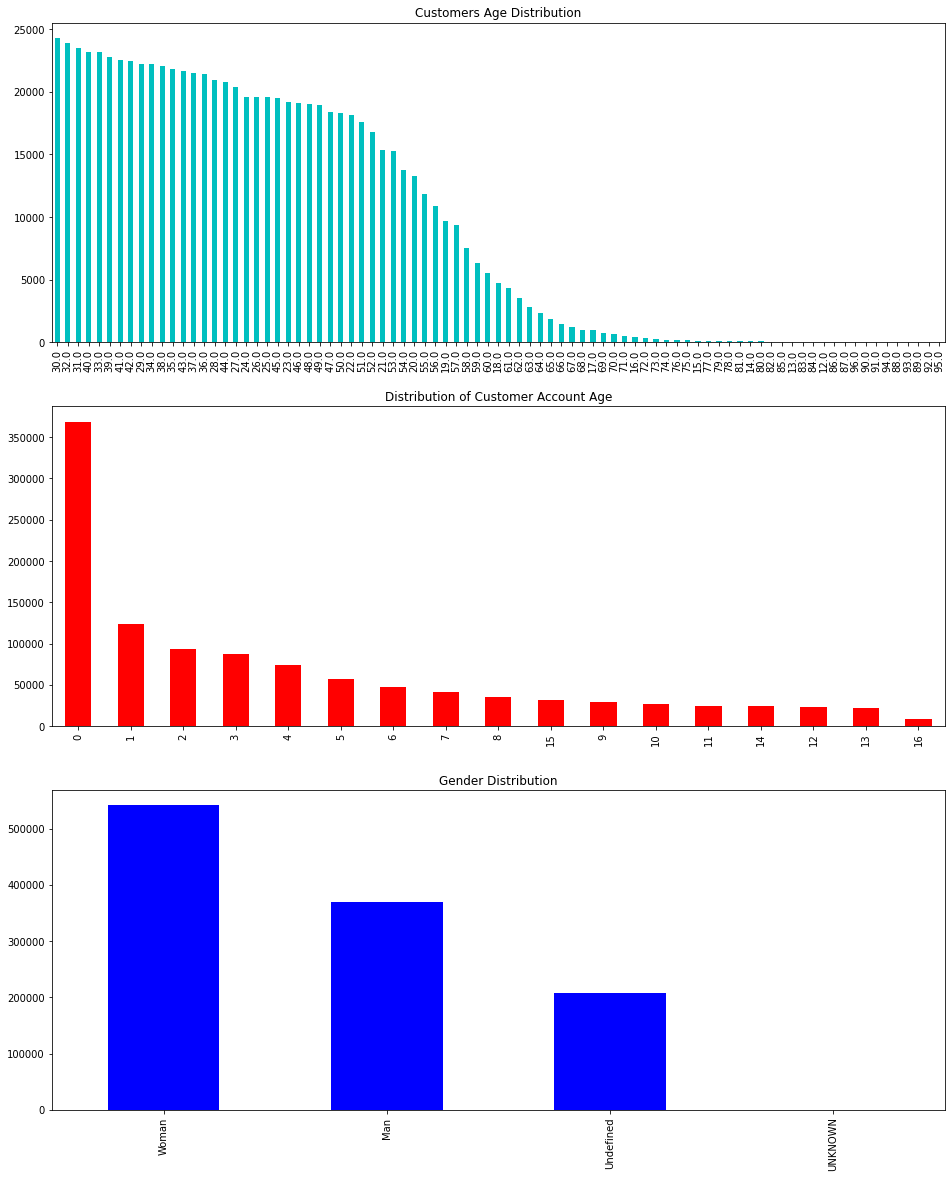

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize = (16, 20))

dataset.Customer_Age.value_counts().plot(kind = 'bar', color = 'c', ax = axes[0], title = 'Customers Age Distribution')

dataset.Account_Age.value_counts().plot(kind = 'bar', color = 'r', ax=axes[1], title = 'Distribution of Customer Account Age')

dataset.Gender.value_counts().plot(kind = 'bar', color = 'b', ax=axes[2], title= 'Gender Distribution')


**The following graph clearly explains the sales count based on category distribution. The highest sales are obtained from the category 'Fashion/3rd Party Apparel' which is 206933**.   

Fashion / 3rd Party - Apparel        206933
Entertainment - Apparel              172675
Music - Apparel                      167358
Fashion / Private label - Apparel    152961
Entertainment - Accessories           83394
Fashion - Accessories                 70649
Media                                 64204
Funshirts&Hoodies - Apparel           62647
BSC Membership                        56712
Music - Accessories                   25942
Name: Category_Reporting, dtype: int64


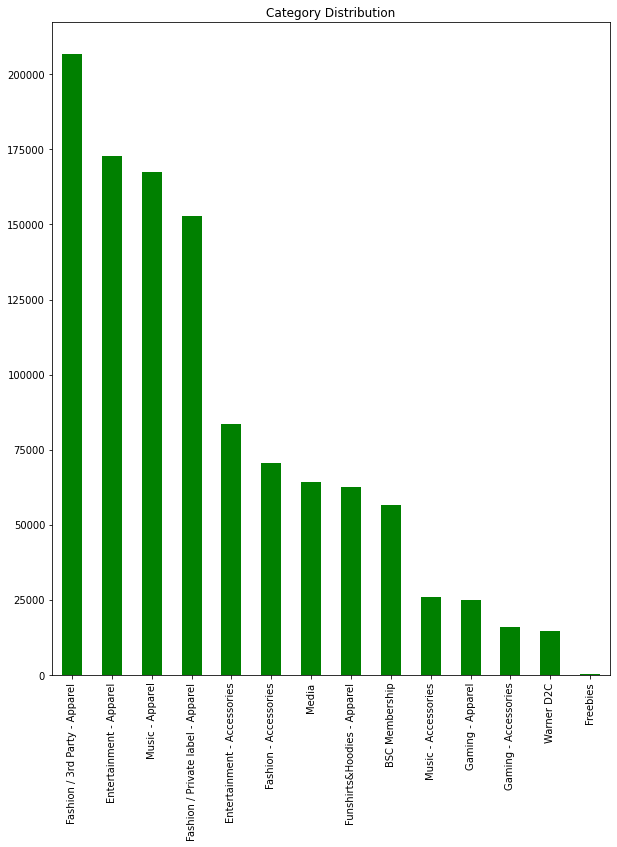

In [9]:
fig, axes = plt.subplots(1, 1, figsize = (10, 12))

print(dataset.Category_Reporting.value_counts()[:10])
dataset.Category_Reporting.value_counts().plot(kind = 'bar', color = 'g', title='Category Distribution')

Checking null values in dataset

In [10]:
dataset.isnull().sum()

CustomerHash                  0
OrderHash                     0
Customer_Age             327211
Gender                        0
Account_Age                   0
AffinityProductGender         0
Category_Reporting            0
Genre                         0
ClientType                11606
PartnerProgram1               0
PartnerProgram2               0
FirstOrder                    0
Marketing_Channel             3
Pieces_Ordered                0
Pieces_Outbound           22253
Pieces_Returns           893123
Pieces_Fulfilled          22253
OrderValue                    0
Revenue_Goods             22253
Delivery_Value            22253
Return_Value             893123
Discount_Total                0
OrderProfit               22253
DateTimeOrder                 0
dtype: int64

Here the dataset is updated further by deleteing the null values from the 'OrderProfit' column as K-Means clustering algorithm requires no null values and the 'OrderProfit' column is one of the key entity in the analysis of this sales dataset. 

In [11]:
dataset2 = dataset[dataset['OrderProfit'].notna()]
dataset2

,CustomerHash,OrderHash,Customer_Age,Gender,Account_Age,AffinityProductGender,Category_Reporting,Genre,ClientType,PartnerProgram1,PartnerProgram2,FirstOrder,Marketing_Channel,Pieces_Ordered,Pieces_Outbound,Pieces_Returns,Pieces_Fulfilled,OrderValue,Revenue_Goods,Delivery_Value,Return_Value,Discount_Total,OrderProfit,DateTimeOrder
0,0xA09E6101DF2E146E55BA9183F8E3994D98F5C963,0x8B9731CAF4EDB3333DC0B29D92399C654692BFE3,53.0,Man,10,Female,Fashion / Private label - Apparel,Private label,desktop,No,No,0,direct,1,1.0,NaN,1.0,53.2185,53.22,53.22,NaN,-5.5966,32.8376,2019-11-29
1,0x678B7B262CE7FFE0EEC0AD8FD784AA1F46C65875,0xBFD162E330E8783658BB4F2A26B05A300FEC6253,NaN,Woman,0,Unisex,Warner D2C,Warner D2C,mobile,No,No,1,seo,1,1.0,NaN,1.0,29.4034,29.40,29.40,NaN,-12.6100,17.0572,2019-11-23
2,0xEDC6F42832CD97571C60E48212855E142D2309C4,0x5513669E48EAEB800E965C9428531EBCAE3EC20A,NaN,Man,0,Male,Fashion / Private label - Apparel,Private label,mobile,No,No,0,newsletter,1,1.0,NaN,1.0,33.6050,33.61,33.61,NaN,0.0000,17.1399,2019-11-28
3,0x1745982240E0CC07B67EE14FC23237BEDBF90CB6,0xAB171C94A128A5607D282305580E394B45858A91,21.0,Man,0,Female,BSC Membership,Other,app,Yes,No,0,newsletter,1,1.0,NaN,1.0,8.3613,8.36,8.36,NaN,0.0000,8.0383,2019-11-26
4,0x2E062AD2957C94EB084BBE68C06531010EC45CE4,0x913E11D078A059D63B31101C8B2A2141C89EA12F,42.0,Undefined,2,Unisex,BSC Membership,Other,desktop,Yes,No,0,direct,1,1.0,NaN,1.0,8.3613,8.36,8.36,NaN,0.0000,8.1544,2019-11-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119017,0xACF2B70C9F3F5A36764BD4047F5ADC4D6AEB29D8,0x01A5D1B088B92C7B40FC59E64FC80FE38967C5A0,31.0,Woman,6,Female,Fashion - Accessories,Private label,app,Yes,No,0,direct,9,9.0,NaN,9.0,89.8906,89.90,89.90,NaN,-14.2200,48.9076,2021-05-04
1119018,0x7B400C5B1671B14515E3BED7389A17FB505C8954,0xFAA8A9DBC197A10995D2FD81AFF0B8800649DDC4,NaN,Woman,5,Unisex,BSC Membership,Other,desktop,Yes,No,0,direct,1,1.0,NaN,1.0,8.3613,8.36,8.36,NaN,0.0000,8.1221,2021-05-07
1119019,0xD45E5769BA2152AA13A72724C917E2ED847D0274,0x6455014A3142224B5590495865B40BD5DB382291,63.0,Man,2,Male,Entertainment - Apparel,Merchandise - Film & TV,mobile,No,No,0,pla,3,3.0,NaN,3.0,37.2689,37.26,37.26,NaN,-9.7300,-12.1758,2021-05-05
1119020,0x86681FEAA1F22746666BBFA068B6022E57EC52C7,0x5A9F947A4829981BFEE98C860125912BF5210C71,NaN,Woman,6,Unisex,Fashion / 3rd Party - Apparel,3rd Party Brands,desktop,No,Yes,0,Payback,9,9.0,-9.0,0.0,163.5548,0.00,163.57,-163.57,-43.3200,-19.0655,2021-05-02


The 'CustomerHash', 'OrderHash', 'Customer_Age','Gender','AffinityProductGender', 'Category_Reporting', 'Genre', 'ClientType', 'PartnerProgram1', 'PartnerProgram2','FirstOrder',	'Pieces_Ordered',	'Pieces_Fulfilled', 'Marketing_Channel', 'Pieces_Outbound', 'Pieces_Returns', 'Revenue_Goods', 'Delivery_Value', 'Return_Value', 'DateTimeOrder' have been dropped in the following block as the clusters show no significant differences in the trends, as per the polar graphs. Following are the four features that will be considered further for customer behaviour analysis 'Account_Age', 'OrderValue', 'Discount_Total', 'OrderProfit'. 

In [12]:
dataset2.drop(['CustomerHash', 'OrderHash', 'Customer_Age','Gender','AffinityProductGender', 'Category_Reporting', 'Genre', 'ClientType', 'PartnerProgram1', 'PartnerProgram2','FirstOrder',	'Pieces_Ordered',	'Pieces_Fulfilled', 'Marketing_Channel', 'Pieces_Outbound', 'Pieces_Returns', 'Revenue_Goods', 'Delivery_Value', 'Return_Value', 'DateTimeOrder'], axis = 1, inplace=True)

dataset2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Account_Age,OrderValue,Discount_Total,OrderProfit
0,10,53.2185,-5.5966,32.8376
1,0,29.4034,-12.6100,17.0572
2,0,33.6050,0.0000,17.1399
3,0,8.3613,0.0000,8.0383
4,2,8.3613,0.0000,8.1544
...,...,...,...,...
1119017,6,89.8906,-14.2200,48.9076
1119018,5,8.3613,0.0000,8.1221
1119019,2,37.2689,-9.7300,-12.1758
1119020,6,163.5548,-43.3200,-19.0655


Analysing the null values in the dataframe.

In [13]:
dataset2.isnull().sum()

Account_Age       0
OrderValue        0
Discount_Total    0
OrderProfit       0
dtype: int64

In the following Elbow plot, number of clusters has been obtained which is 3 clusters. 

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import numpy as np

scaler = MinMaxScaler()
scaler.fit(dataset2)

X=scaler.transform(dataset2)
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=3,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])


Using K-Means Algoriothm for clustering, which is the most suitable model for this type of a problem.

In [15]:
km = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

**To understand the customer behaviour through the three clusters depending on the account age, order profit, discount total and order value, the following polar graph is considered. There are three clusters namely 0,1,and 2 represented by blue , red and green lines on the polar graph. The customer behaviour of cluster 0 and the sum of the order value is lower as compared to the sum of the order value of cluster 2 which is also a cluster having a higher account age, this can be a factor in categorizing the customers into spenders, customers inclined more towards discounts and the customers that are inclined towards viewing the products. Customers in cluster 0 are more inclined towards discounts, with an account age comparativly lower than the other clusters, they inturn produce the least amount of profit to the company. The Cluster 1 is a moderate batch of customers in terms of account age, Also it has higher order profit than the cluster 0 and little less sum of order value compare to cluster 0. Finally, the cluster 2 includes customers with a higher account age and a lower amount of order value but providing the highest order profit as compared to both cluster 0 and cluster 1**.   

In [16]:
import plotly.express as px

km.fit(X)

dataset2['Cluster'] = km.labels_

polar=dataset2.groupby("Cluster").mean().reset_index()
polar=pd.melt(polar,id_vars=["Cluster"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="Cluster", line_close=True,height=800,width=1400)
fig4.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Now we are going to calculate number of percentage each cluster has in our dataset and we got 60.2% customers belongs from the cluster 0 which is the group of customers who are discount lover and have less old accounts compare to other clusters. Cluster 1 and 2 have total number of percentages 25.5% and 14.3% in our dataset.  

In [18]:
pie = dataset2.groupby('Cluster').size().reset_index()
pie.columns=['Cluster','value']
px.pie(pie,values='value',names='Cluster',color=['blue','red','green'])

Saving dataset by creating new column called Cluster 

In [19]:
dataset3 = dataset[dataset['OrderProfit'].notna()]

dataset3['Cluster'] = dataset2['Cluster']

dataset3.to_csv('/content/customer_seg.csv', index=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Now we are going to predict future values for Category_Reporting, and we have 14 different categories which we have mentioned in our previous discussion. Below code helping us to get dates in ascending order and grouping the categories so we will get data which is total number of count for all the categories in a daily manner.  

In [20]:
from sklearn.preprocessing import LabelEncoder

df_main = dataset.sort_values(by= 'DateTimeOrder', ascending=True)

df_main = df_main.groupby(['DateTimeOrder', 'Category_Reporting'], as_index=False).size()


Below function giving us values which are DateTimeOrder and Number columns (we have to pass category as parameter).  

In [21]:
def Cat_Rep(Cat_Rep_Str):

  Cat_Rep = df_main.groupby(['DateTimeOrder'], as_index=False).size()

  Cat_Rep['size'].values[:] = 0

  Cat_Rep['Category_Reporting'] = Cat_Rep_Str

  Cat_Rep = Cat_Rep.merge(df_main, on=['DateTimeOrder', 'Category_Reporting'], how='left')

  Cat_Rep.to_excel('/content/fashion_3rd.xlsx')

  Cat_Rep['Number'] = Cat_Rep['size_x'] + Cat_Rep['size_y']

  Cat_Rep.drop(columns=['size_x', 'size_y'], inplace=True, axis =1)

  Cat_Rep['Number'] = Cat_Rep['Number'].fillna(0).astype(int)
  
  return Cat_Rep


We are applying Cat_Rep function to each category.

In [31]:
df_Fashion_3rd = Cat_Rep('Fashion / 3rd Party - Apparel')

df_Entertainment_Apparel = Cat_Rep('Entertainment - Apparel')

df_Music_Apparel = Cat_Rep('Music - Apparel')

df_Fashion_Private_lab = Cat_Rep('Fashion / Private label - Apparel')

df_Entertainment_Accessories = Cat_Rep('Entertainment - Accessories')

df_Fashion_Accessories = Cat_Rep('Fashion - Accessories')

df_Media = Cat_Rep('Media')

df_Funshirts_and_hoodies = Cat_Rep('Funshirts&Hoodies - Apparel')

df_BSC_Member = Cat_Rep('BSC Membership')

df_Music_Accessories = Cat_Rep('Music - Accessories')

df_Gaming_Apparel = Cat_Rep('Gaming - Apparel')

df_Gaming_Accessories = Cat_Rep('Gaming - Accessories')

df_Warner = Cat_Rep('Warner D2C')

df_Freebies = Cat_Rep('Freebies')


**The below function is helping us to train data and we are applying this to each and every category. Also, we are saving model for every category. 
We are using LSTM neural network layers to predict our future values using historical data and we are giving past 30 days of data as a feature to our model and 31st day of data as a label so using past 30 days our model can predict data of day 31st**. 

In [36]:


def training_data(Category):

  X = Category.iloc[:, 1].values
  X = X.reshape(-1, 1)

  scaler = MinMaxScaler(feature_range=(0,1))

  scaled_data = scaler.fit_transform(X)

  x_train = []
  y_train = []


  for i in range(30, len(X)):
    x_train.append(scaled_data[i-30:i, 0])
    y_train.append(scaled_data[i, 0 ])

  x_train = np.asarray(x_train)
  y_train = np.asarray(y_train)



  x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)


  model = Sequential()

  model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 50, return_sequences = True))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 50, return_sequences = True))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 50))
  model.add(Dropout(0.2))

  model.add(Dense(units = 1))


  model.compile(optimizer = 'adam', loss ='mean_squared_error')

  model.fit(x_train, y_train, epochs = 100, batch_size = 32)

  model.save('/content/return_val_model.h5')
  




We have trained our all models using the above function. The below code and its output shows one of the example of it.

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

df_Freebies_model = training_data(df_Freebies)



Epoch 1/100
17/17 [==============================] - 8s 70ms/step - loss: 0.0060
Epoch 2/100
17/17 [==============================] - 1s 71ms/step - loss: 0.0059
Epoch 3/100
17/17 [==============================] - 1s 69ms/step - loss: 0.0058
Epoch 4/100
17/17 [==============================] - 1s 72ms/step - loss: 0.0057
Epoch 5/100
17/17 [==============================] - 1s 69ms/step - loss: 0.0057
Epoch 6/100
17/17 [==============================] - 1s 70ms/step - loss: 0.0056
Epoch 7/100
17/17 [==============================] - 1s 69ms/step - loss: 0.0054
Epoch 8/100
17/17 [==============================] - 1s 85ms/step - loss: 0.0059
Epoch 9/100
17/17 [==============================] - 1s 74ms/step - loss: 0.0055
Epoch 10/100
17/17 [==============================] - 1s 71ms/step - loss: 0.0057
Epoch 11/100
17/17 [==============================] - 1s 69ms/step - loss: 0.0053
Epoch 12/100
17/17 [==============================] - 1s 70ms/step - loss: 0.0053
Epoch 13/100
17/17 [=====

**The below function we have written in a such a way that it will predict value using past 30 days of data using tranined models**.

In [39]:
from tensorflow.keras.models import load_model

def prediction(Cat_Data):
  predict_data = Cat_Data.iloc[:, 1].values

  predict_data = predict_data[len(predict_data) - 30: ]

  predict_data = predict_data.reshape(-1, 1)

  scaled_predict_data = scaler.fit_transform(predict_data)

  predicted_data = []
  model = load_model('/content/return_val_model.h5')

  for i in range(30, 51):
    X = scaled_predict_data[-30:]

    X = X.reshape((1, 30, 1))

    out = model.predict(X)[0][0]

    scaled_predict_data = np.append(scaled_predict_data, out)

  scaled_predict_data = np.array(scaled_predict_data)

  scaled_predict_data = scaled_predict_data.reshape(1, -1)

  predicted_number = scaler.inverse_transform(scaled_predict_data)
  
  return predicted_number



In [44]:
future_dates = pd.read_excel('/content/2021_dates.xlsx')
future_dates

,DateTime
0,2021-05-11
1,2021-05-12
2,2021-05-13
3,2021-05-14
4,2021-05-15
...,...
230,2021-12-27
231,2021-12-28
232,2021-12-29
233,2021-12-30


In [ ]:
def predicting_number(Category, future_dates):
  res_df = pd.DataFrame({'size': Category})

  future_dates['Number'] = res_df

  future_numbers  = future_dates.groupby(pd.Grouper(key='DateTime', freq='1M')).sum() # groupby each 1 month
  
  return future_numbers

**Using prediction and predicting_number functions we are predicting values for every category in our dataset for subsequent data and also saving results in terms of excel file. In DateTime column we have mentioned last date of the perticular month as we are getting total number of count using Number column for the perticular category**.   

In [ ]:
test_number_Fashion_3rd = prediction(df_Fashion_3rd)
test_number_Fashion_3rd = test_number_Fashion_3rd[0][30:]

future_numbers = predicting_number(test_number_Fashion_3rd, future_dates)

future_numbers.to_excel('/content/test_number_Fashion_3rd.xlsx')
future_numbers

,Number
DateTime,
2021-05-31,10360.014198
2021-06-30,15025.919103
2021-07-31,15602.048414
2021-08-31,15612.906831
2021-09-30,15110.653980
2021-10-31,15614.536374
2021-11-30,15110.867256
2021-12-31,15614.566017


In [ ]:
test_number_Entertainment_Apparel = prediction(df_Entertainment_Apparel)
test_number_Entertainment_Apparel = test_number_Entertainment_Apparel[0][30:]

future_numbers = predicting_number(test_number_Entertainment_Apparel, future_dates)

future_numbers.to_excel('/content/test_number_Entertainment_Apparel.xlsx')

future_numbers

,Number
DateTime,
2021-05-31,7104.259181
2021-06-30,10544.783142
2021-07-31,10432.614527
2021-08-31,10702.393234
2021-09-30,10270.141419
2021-10-31,10600.792956
2021-11-30,10315.569068
2021-12-31,10600.141237


In [ ]:
test_number_Music_Apparel = prediction(df_Music_Apparel)
test_number_Music_Apparel = test_number_Music_Apparel[0][30:]

future_numbers = predicting_number(test_number_Music_Apparel, future_dates)

future_numbers.to_excel('/content/test_number_Music_Apparel.xlsx')

future_numbers

,Number
DateTime,
2021-05-31,5478.898041
2021-06-30,7099.733517
2021-07-31,7427.309751
2021-08-31,7433.571823
2021-09-30,7193.849717
2021-10-31,7433.639831
2021-11-30,7193.844715
2021-12-31,7433.639542


In [ ]:
test_number_Fashion_Private_lab = prediction(df_Fashion_Private_lab)
test_number_Fashion_Private_lab = test_number_Fashion_Private_lab[0][30:]

future_numbers = predicting_number(test_number_Fashion_Private_lab, future_dates)

future_numbers.to_excel('/content/test_number_Fashion_Private_lab.xlsx')

future_numbers

,Number
DateTime,
2021-05-31,1779.155193
2021-06-30,-5745.296046
2021-07-31,-6421.340561
2021-08-31,-6444.876850
2021-09-30,-6238.633590
2021-10-31,-6446.715733
2021-11-30,-6238.767055
2021-12-31,-6446.728859


In [ ]:
test_number_Entertainment_Accessories = prediction(df_Entertainment_Accessories)
test_number_Entertainment_Accessories = test_number_Entertainment_Accessories[0][30:]

future_numbers = predicting_number(test_number_Entertainment_Accessories, future_dates)

future_numbers.to_excel('/content/test_number_Entertainment_Accessories.xlsx')

future_numbers

,Number
DateTime,
2021-05-31,2844.473441
2021-06-30,4094.158623
2021-07-31,4245.835916
2021-08-31,4253.904828
2021-09-30,4118.210163
2021-10-31,4255.512510
2021-11-30,4118.168183
2021-12-31,4255.420469


In [ ]:
test_number_Fashion_Accessories = prediction(df_Fashion_Accessories)
test_number_Fashion_Accessories = test_number_Fashion_Accessories[0][30:]

future_numbers = predicting_number(test_number_Fashion_Accessories, future_dates)

future_numbers.to_excel('/content/test_number_Fashion_Accessories.xlsx')

future_numbers

,Number
DateTime,
2021-05-31,1728.896574
2021-06-30,2346.880042
2021-07-31,2397.957848
2021-08-31,2393.614895
2021-09-30,2315.719559
2021-10-31,2392.791944
2021-11-30,2315.585408
2021-12-31,2392.768205


In [ ]:
test_number_Media = prediction(df_Media)
test_number_Media = test_number_Media[0][30:]

future_numbers = predicting_number(test_number_Media, future_dates)

future_numbers.to_excel('/content/test_number_Media.xlsx')

future_numbers

,Number
DateTime,
2021-05-31,2116.213910
2021-06-30,3036.545971
2021-07-31,3136.359500
2021-08-31,3136.368761
2021-09-30,3035.195007
2021-10-31,3136.368176
2021-11-30,3035.195009
2021-12-31,3136.368176


In [ ]:
test_number_Funshirts_and_hoodies = prediction(df_Funshirts_and_hoodies)
test_number_Funshirts_and_hoodies = test_number_Funshirts_and_hoodies[0][30:]

future_numbers = predicting_number(test_number_Funshirts_and_hoodies, future_dates)

future_numbers.to_excel('/content/test_number_Funshirts_and_hoodies.xlsx')

future_numbers

,Number
DateTime,
2021-05-31,3145.618443
2021-06-30,4335.097220
2021-07-31,4429.275466
2021-08-31,4417.424074
2021-09-30,4271.889395
2021-10-31,4413.401829
2021-11-30,4270.787332
2021-12-31,4413.074223


In [ ]:
test_number_BSC_Member = prediction(df_BSC_Member)
test_number_BSC_Member = test_number_BSC_Member[0][30:]

future_numbers = predicting_number(test_number_BSC_Member, future_dates)

future_numbers.to_excel('/content/test_number_BSC_Member.xlsx')

future_numbers

,Number
DateTime,
2021-05-31,1229.252125
2021-06-30,1767.904278
2021-07-31,1826.724117
2021-08-31,1826.724108
2021-09-30,1767.797524
2021-10-31,1826.724108
2021-11-30,1767.797524
2021-12-31,1826.724108


In [ ]:
test_number_Music_Accessories = prediction(df_Music_Accessories)
test_number_Music_Accessories = test_number_Music_Accessories[0][30:]

future_numbers = predicting_number(test_number_Music_Accessories, future_dates)

future_numbers.to_excel('/content/test_number_Music_Accessories.xlsx')

future_numbers

,Number
DateTime,
2021-05-31,487.681782
2021-06-30,706.455141
2021-07-31,729.811954
2021-08-31,729.811941
2021-09-30,706.269620
2021-10-31,729.811941
2021-11-30,706.269620
2021-12-31,729.811941


In [ ]:
test_number_Gaming_Apparel = prediction(df_Gaming_Apparel)
test_number_Gaming_Apparel = test_number_Gaming_Apparel[0][30:]

future_numbers = predicting_number(test_number_Gaming_Apparel, future_dates)

future_numbers.to_excel('/content/test_number_Gaming_Apparel.xlsx')

future_numbers

,Number
DateTime,
2021-05-31,930.215093
2021-06-30,1202.203039
2021-07-31,1276.685158
2021-08-31,1286.438595
2021-09-30,1244.564053
2021-10-31,1285.847151
2021-11-30,1244.372363
2021-12-31,1285.856226


In [ ]:
test_number_Gaming_Accessories = prediction(df_Gaming_Accessories)
test_number_Gaming_Accessories = test_number_Gaming_Accessories[0][30:]

future_numbers = predicting_number(test_number_Gaming_Accessories, future_dates)

future_numbers.to_excel('/content/test_number_Gaming_Accessories.xlsx')

future_numbers

,Number
DateTime,
2021-05-31,605.645840
2021-06-30,819.182554
2021-07-31,778.020189
2021-08-31,704.460843
2021-09-30,617.335438
2021-10-31,585.034832
2021-11-30,530.240325
2021-12-31,524.355147


In [ ]:
test_number_Warner = prediction(df_Warner)
test_number_Warner = test_number_Warner[0][30:]

future_numbers = predicting_number(test_number_Warner, future_dates)

future_numbers.to_excel('/content/test_number_Warner.xlsx')

future_numbers

,Number
DateTime,
2021-05-31,291.322580
2021-06-30,256.979051
2021-07-31,286.683988
2021-08-31,287.761032
2021-09-30,278.535501
2021-10-31,287.824341
2021-11-30,278.540008
2021-12-31,287.824715


In [ ]:
test_number_Freebies = prediction(df_Freebies)
test_number_Freebies = test_number_Freebies[0][30:]

future_numbers = predicting_number(test_number_Freebies, future_dates)

future_numbers.to_excel('/content/test_number_Freebies.xlsx')

future_numbers

,Number
DateTime,
2021-05-31,0.325721
2021-06-30,3.663119
2021-07-31,2.094951
2021-08-31,3.805067
2021-09-30,2.859113
2021-10-31,3.435337
2021-11-30,3.491718
2021-12-31,3.217486


In [25]:
df_ret = dataset[['DateTimeOrder', 'Pieces_Returns']]

df_ret['Pieces_Returns'] = df_ret['Pieces_Returns'].abs()

df_ret['Pieces_Returns'] = df_ret['Pieces_Returns'].fillna(0)

df_ret = df_ret.groupby(['DateTimeOrder'], as_index=False).sum()

df_ret.to_excel('/content/df_ret.xlsx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:

ret_values_train = training_data(df_ret)
#df_ret.iloc[:, 1].values

Epoch 1/100
17/17 [==============================] - 10s 79ms/step - loss: 0.0215
Epoch 2/100
17/17 [==============================] - 2s 89ms/step - loss: 0.0102
Epoch 3/100
17/17 [==============================] - 1s 85ms/step - loss: 0.0096
Epoch 4/100
17/17 [==============================] - 1s 78ms/step - loss: 0.0091
Epoch 5/100
17/17 [==============================] - 1s 82ms/step - loss: 0.0091
Epoch 6/100
17/17 [==============================] - 1s 80ms/step - loss: 0.0091
Epoch 7/100
17/17 [==============================] - 1s 77ms/step - loss: 0.0091
Epoch 8/100
17/17 [==============================] - 1s 84ms/step - loss: 0.0093
Epoch 9/100
17/17 [==============================] - 2s 93ms/step - loss: 0.0088
Epoch 10/100
17/17 [==============================] - 1s 84ms/step - loss: 0.0088
Epoch 11/100
17/17 [==============================] - 2s 91ms/step - loss: 0.0090
Epoch 12/100
17/17 [==============================] - 1s 87ms/step - loss: 0.0093
Epoch 13/100
17/17 [====

In [52]:
test_number_return_value = prediction(df_ret)
test_number_return_value = test_number_return_value[0][30:]


res_df = pd.DataFrame({'number': test_number_return_value})

future_dates['Number'] = res_df

  #future_numbers  = future_dates.groupby(pd.Grouper(key='DateTime', freq='1M')).sum() # groupby each 1 month
  
  #return future_numbers
future_dates = future_dates.loc[:20, :]

future_dates.to_excel('/content/return_pieces_number.xlsx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

